# Illustrative example

This example explains the usage of the Python 3 library package `crispyn` that provides methods for multi-criteria decision analysis using objective and subjective weighting methods. This library contains module `weighting_methods` with the following weighting methods:

## Objective weighting methods:

1. Equal `equal_weighting`

2. Entropy `entropy_weighting`

3. Standard deviation `std_weighting`

4. CRITIC `critic_weighting`

5. Gini coefficient-based `gini_weighting`

6. MEREC `merec_weighting`

7. Statistical variance `stat_var_weighting`

8. CILOS `cilos_weighting`

9. IDOCRIW `idocriw_weighting`

10. Angle `angle_weighting`

11. Coefficient of variance `coeff_var_weighting`

## Subjective weighting methods:

12. AHP weighting `AHP_WEIGHTING`

13. SWARA weighting `swara_weighting`

14. LBWA weighting `lbwa_weighting`

15. SAPEVO weighting `sapevo_weighting`

In addition to the weighting methods, the library also provides other methods necessary for multi-criteria decision analysis, which are as follows:

The VIKOR method for multi-criteria decision analysis `VIKOR` in module `mcda_methods`,

The Stochastic Multi-criteria Acceptability Analysis method (SMAA) for determining criteria weights interacting with the VIKOR method `VIKOR_SMAA`

Normalization techniques in module `normalizations`:

1. Linear `linear_normalization`

2. Minimum-Maximum `minmax_normalization`

3. Maximum `max_normalization`

4. Sum `sum_normalization`

5. Vector `vector_normalization`

Correlation coefficients in module `correlations`:

1. Spearman rank correlation coefficient rs `spearman`

2. Weighted Spearman rank correlation coefficient rw `weighted_spearman`

3. Pearson coefficent `pearson_coeff`

`rank_preferences` function in module `additions`

Import other necessary Python modules.

In [3]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

Import the necessary modules and methods from package `crispyn`.

In [4]:
from crispyn.mcda_methods import VIKOR
from crispyn.mcda_methods import VIKOR_SMAA
from crispyn.additions import rank_preferences
from crispyn import correlations as corrs
from crispyn import normalizations as norm_methods
from crispyn import weighting_methods as mcda_weights

Functions for results visualization.

In [1]:
# Functions for visualizations

def plot_barplot(df_plot, x_name, y_name, title):
    """
    Display stacked column chart of weights for criteria for `x_name == Weighting methods`
    and column chart of ranks for alternatives `x_name == Alternatives`

    Parameters
    ----------
        df_plot : dataframe
            dataframe with criteria weights calculated different weighting methods
            or with alternaives rankings for different weighting methods
        x_name : str
            name of x axis, Alternatives or Weighting methods
        y_name : str
            name of y axis, Ranks or Weight values
        title : str
            name of chart title, Weighting methods or Criteria

    Examples
    ----------
    >>> plot_barplot(df_plot, x_name, y_name, title)
    """
    
    list_rank = np.arange(1, len(df_plot) + 1, 1)
    stacked = True
    width = 0.5
    if x_name == 'Alternatives':
        stacked = False
        width = 0.8
    elif x_name == 'Alternative':
        pass
    else:
        df_plot = df_plot.T
    ax = df_plot.plot(kind='bar', width = width, stacked=stacked, edgecolor = 'black', figsize = (9,4))
    ax.set_xlabel(x_name, fontsize = 12)
    ax.set_ylabel(y_name, fontsize = 12)

    if x_name == 'Alternatives':
        ax.set_yticks(list_rank)

    ax.set_xticklabels(df_plot.index, rotation = 'horizontal')
    ax.tick_params(axis = 'both', labelsize = 12)

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
    ncol=4, mode="expand", borderaxespad=0., edgecolor = 'black', title = title, fontsize = 11)

    ax.grid(True, linestyle = '--')
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.savefig('results/bar_chart_weights_' + x_name + '.pdf')
    plt.savefig('results/bar_chart_weights_' + x_name + '.eps')
    plt.show()


def draw_heatmap(data, title):
    """
    Display heatmap with correlations of compared rankings generated using different methods

    Parameters
    ----------
        data : dataframe
            dataframe with correlation values between compared rankings
        title : str
            title of chart containing name of used correlation coefficient

    Examples
    ----------
    >>> draw_heatmap(data, title)
    """

    plt.figure(figsize = (6, 4))
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(data, annot=True, fmt=".2f", cmap="RdYlBu",
                          linewidth=0.5, linecolor='w')
    plt.yticks(va="center")
    plt.xlabel('Weighting methods')
    plt.title('Correlation coefficient: ' + title)
    plt.tight_layout()
    plt.savefig('results/heatmap_weights.pdf')
    plt.savefig('results/heatmap_weights.eps')
    plt.show()

    
def draw_heatmap_smaa(data, title):
    """
    Display heatmap with correlations of compared rankings generated using different methods

    Parameters
    ----------
        data : dataframe
            dataframe with correlation values between compared rankings
        title : str
            title of chart containing name of used correlation coefficient

    Examples
    ----------
    >>> draw_heatmap(data, title)
    """

    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(data, annot=True, fmt=".2f", cmap="RdYlBu_r",
                        linewidth=0.05, linecolor='w')
    plt.yticks(rotation=0)
    plt.ylabel('Alternatives')
    plt.tick_params(labelbottom=False,labeltop=True)
    
    plt.title(title)
    plt.tight_layout()
    plt.savefig('results/heatmap_smaa.pdf')
    plt.savefig('results/heatmap_smaa.eps')
    plt.show()


def plot_boxplot(data):
    """
    Display boxplot showing distribution of criteria weights determined with different methods.

    Parameters
    ----------
        data : dataframe
            dataframe with correlation values between compared rankings

    Examples
    ---------
    >>> plot_boxplot(data)
    """
    
    df_melted = pd.melt(data)
    plt.figure(figsize = (7, 4))
    ax = sns.boxplot(x = 'variable', y = 'value', data = df_melted, width = 0.6)
    ax.grid(True, linestyle = '--')
    ax.set_axisbelow(True)
    ax.set_xlabel('Criterion', fontsize = 12)
    ax.set_ylabel('Different weights distribution', fontsize = 12)
    plt.tight_layout()
    plt.savefig('results/boxplot_weights.pdf')
    plt.savefig('results/boxplot_weights.eps')
    plt.show()


# plot radar chart
def plot_radar(data):
    """
    Visualization method to display rankings of alternatives obtained with different methods
    on the radar chart.

    Parameters
    -----------
        data : DataFrame
            DataFrame containing containing rankings of alternatives obtained with different 
            methods. The particular rankings are contained in subsequent columns of DataFrame.
        
    Examples
    ----------
    >>> plot_radar(data)
    """

    fig=plt.figure()
    ax = fig.add_subplot(111, polar = True)

    for col in list(data.columns):
        labels=np.array(list(data.index))
        stats = data.loc[labels, col].values

        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        # close the plot
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))
    
        lista = list(data.index)
        lista.append(data.index[0])
        labels=np.array(lista)

        ax.plot(angles, stats, '-o', linewidth=2)
        # ax.fill(angles, stats, label='_nolegend_', alpha=0.5)
    
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_rgrids(np.arange(1, data.shape[0] + 1, 1))
    ax.grid(True)
    ax.set_axisbelow(True)
    if data.shape[1] % 2 == 0:
        ncol = data.shape[1] // 2
    else:
        ncol = data.shape[1] // 2 + 1
    plt.legend(data.columns, bbox_to_anchor=(-0.1, 1.1, 1.2, .102), loc='lower left',
    ncol = ncol, mode="expand", borderaxespad=0., edgecolor = 'black', title = 'Weighting methods', fontsize = 12)
    plt.tight_layout()
    plt.show()


# bar (column) chart
def plot_barplot_stacked(df_plot, stacked = False):
    """
    Visualization method to display column chart of alternatives rankings obtained with 
    different methods.

    Parameters
    ----------
        df_plot : DataFrame
            DataFrame containing rankings of alternatives obtained with different methods.
            The particular rankings are included in subsequent columns of DataFrame.

        stacked : Boolean
            Variable denoting if the chart is to be stacked or not.

    Examples
    ----------
    >>> plot_barplot(df_plot)
    """

    ax = df_plot.plot(kind='bar', width = 0.6, stacked=stacked, edgecolor = 'black', figsize = (9,4))
    if stacked == False:
        list_rank = np.arange(0, 0.30, 0.05)
        ax.set_yticks(list_rank)
        ax.set_ylim(0, 0.25)

    ax.set_xticklabels(df_plot.index, rotation = 'horizontal')
    ax.tick_params(axis = 'both', labelsize = 12)
    y_ticks = ax.yaxis.get_major_ticks()
    
    ncol = df_plot.shape[1]
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
    ncol = ncol, mode="expand", borderaxespad=0., edgecolor = 'black', title = 'Criteria', fontsize = 12)

    ax.set_xlabel('Weighting methods', fontsize = 12)
    ax.set_ylabel('Weight value', fontsize = 12)

    ax.grid(True)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()


def plot_radar_weights(data):
    """
    Visualization method to display weights values obtained with different weighing methods
    on the radar chart.

    Parameters
    -----------
        data : DataFrame
            DataFrame containing weights obtained with different weighting
            methods. The particular weights are contained in subsequent columns of DataFrame.
        
    Examples
    ----------
    >>> plot_radar_weights(data)
    """

    fig=plt.figure()
    ax = fig.add_subplot(111, polar = True)

    for col in list(data.columns):
        labels=np.array(list(data.index))
        stats = data.loc[labels, col].values

        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        # close the plot
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))
    
        lista = list(data.index)
        lista.append(data.index[0])
        labels=np.array(lista)

        ax.plot(angles, stats, linewidth=2)
        ax.fill(angles, stats, label='_nolegend_', alpha=0.3)
    
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_rgrids(np.round(np.linspace(0, np.max(stats) + 0.05, 5), 2))
    ax.grid(True)
    ax.set_axisbelow(True)
    if data.shape[1] % 2 == 0:
        ncol = data.shape[1] // 2
    else:
        ncol = data.shape[1] // 2 + 1
    plt.legend(data.columns, bbox_to_anchor=(-0.1, 1.1, 1.2, .102), loc='lower left',
    ncol = ncol, mode="expand", borderaxespad=0., edgecolor = 'black', title = 'Weighting methods', fontsize = 12)
    plt.tight_layout()
    plt.show()


# Create dictionary class
class Create_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

As an illustrative example, a dataset will be used containing performances of the twelve best-selling electric cars in 2021 according to a ranking available at https://www.caranddriver.com/features/g36278968/best-selling-evs-of-2021/ The dataset is displayed below. $A_1$-$A_{12}$ are the individual alternatives in rows, columns $C_1$-$C_{11}$ denote the criteria, and the Type row contains the criteria type, where 1 indicates a profit criterion (stimulant) and -1 a cost criterion (destimulant). The following are the evaluation criteria for the electric cars evaluated in this research.

In [4]:
criteria_presentation = pd.read_csv('criteria_electric_cars.csv', index_col = 'Cj')
criteria_presentation

,Name,Unit,Type
Cj,,,
C1,Max speed,mph,1
C2,Battery capacity,kWh,1
C3,Electric motor,kW,1
C4,Maximum torque,Nm,1
C5,Horsepower,hp,1
C6,EPA Fuel Economy Combined,MPGe,1
C7,EPA Fuel Economy City,MPGe,1
C8,EPA Fuel Economy Highway,MPGe,1
C9,EPA range,miles,1


In [5]:
data_presentation = pd.read_csv('electric_cars_2021.csv', index_col = 'Ai')
data_presentation

,Name,C1 Max speed [mph],C2 Battery [kWh],C3 Electric motor [kW] Front,C4 Torque [Nm] Front,C5 Mechanical horsepower [hp],C6 EPA Fuel Economy Combined [MPGe],C7 EPA Fuel Economy City [MPGe],C8 EPA Fuel Economy Highway [MPGe],C9 EPA range [miles],"C10 Turning Diameter / Radius, curb to curb [feet]",C11 Base price [$]
Ai,,,,,,,,,,,,
A1,Tesla Model Y,155.3,74.0,340,673,456.0,111,115,106,244,39.8,65440
A2,Tesla Model 3,162.2,79.5,247,639,283.0,113,118,107,263,38.8,60440
A3,Ford Mustang Mach-E,112.5,68.0,198,430,266.0,98,105,91,230,38.1,56575
A4,Chevrolet Bolt EV and EUV,90.1,66.0,150,360,201.2,120,131,109,259,34.8,32495
A5,Volkswagen ID.4,99.4,77.0,150,310,201.2,97,102,90,260,36.4,45635
A6,Nissan Leaf,89.5,40.0,110,320,147.5,111,123,99,226,34.8,28425
A7,Audi e-tron and e-tron Sportback,124.3,95.0,125,247,187.7,78,78,77,222,40.0,84595
A8,Porsche Taycan,155.3,79.2,160,300,214.6,79,79,80,227,38.4,105150
A9,Tesla Model S,162.2,100.0,205,420,502.9,120,124,115,402,40.3,96440


Load a decision matrix containing only the performance values of the alternatives against the criteria and the criteria type in the last row, as shown below. Transform the decision matrix and criteria type from dataframe to NumPy array.

In [6]:
# Load data from CSV
filename = 'dataset_cars.csv'
data = pd.read_csv(filename, index_col = 'Ai')
# Load decision matrix from CSV
df_data = data.iloc[:len(data) - 1, :]
# Criteria types are in the last row of CSV
types = data.iloc[len(data) - 1, :].to_numpy()

# Convert decision matrix from dataframe to numpy ndarray type for faster calculations.
matrix = df_data.to_numpy()

# Symbols for alternatives Ai
list_alt_names = [r'$A_{' + str(i) + '}$' for i in range(1, df_data.shape[0] + 1)]
# Symbols for columns Cj
cols = [r'$C_{' + str(j) + '}$' for j in range(1, data.shape[1] + 1)]
print('Decision matrix')
df_data

Decision matrix


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
Ai,,,,,,,,,,,
A1,155.3,74.0,340,673,456.0,111,115,106,244,39.8,65440
A2,162.2,79.5,247,639,283.0,113,118,107,263,38.8,60440
A3,112.5,68.0,198,430,266.0,98,105,91,230,38.1,56575
A4,90.1,66.0,150,360,201.2,120,131,109,259,34.8,32495
A5,99.4,77.0,150,310,201.2,97,102,90,260,36.4,45635
A6,89.5,40.0,110,320,147.5,111,123,99,226,34.8,28425
A7,124.3,95.0,125,247,187.7,78,78,77,222,40.0,84595
A8,155.3,79.2,160,300,214.6,79,79,80,227,38.4,105150
A9,162.2,100.0,205,420,502.9,120,124,115,402,40.3,96440


In [7]:
print('Criteria types')
types

Criteria types


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.])

## Objective weighting methods

Calculate the weights with the selected weighing method. In this case, the Entropy weighting method (entropy_weighting) is selected.

In [8]:
weights = mcda_weights.entropy_weighting(matrix)
df_weights = pd.DataFrame(weights.reshape(1, -1), index = ['Weights'], columns = cols)
df_weights

,$C_{1}$,$C_{2}$,$C_{3}$,$C_{4}$,$C_{5}$,$C_{6}$,$C_{7}$,$C_{8}$,$C_{9}$,$C_{10}$,$C_{11}$
Weights,0.057741,0.099843,0.142673,0.096488,0.236087,0.024544,0.032432,0.018126,0.053958,0.003863,0.234244


Use the VIKOR method to determine the value of the preference function (pref) and the ranking of alternatives (rank). The VIKOR method ranks alternatives ascendingly according to preference function values, so the reverse parameter in the `rank_preferences` method is set to False.

In [9]:
# Create the VIKOR method object
vikor = VIKOR(normalization_method=norm_methods.minmax_normalization)

# Calculate alternatives preference function values with VIKOR method
pref = vikor(matrix, weights, types)

# rank alternatives according to preference values
rank = rank_preferences(pref, reverse = False)
df_results = pd.DataFrame(index = list_alt_names)
df_results['Pref'] = pref
df_results['Rank'] = rank
df_results

,Pref,Rank
$A_{1}$,0.000000,1
$A_{2}$,0.325154,2
$A_{3}$,0.531050,4
$A_{4}$,0.682258,5
$A_{5}$,0.734162,7
$A_{6}$,0.922091,10
$A_{7}$,0.884828,9
$A_{8}$,0.821773,8
$A_{9}$,0.332600,3
$A_{10}$,0.940460,11


The second part of the manual contains codes for benchmarking against several different criteria weighting methods. List the weighting methods you wish to explore.

In [10]:
# Create a list with weighting methods that you want to explore
weighting_methods_set = [
    mcda_weights.entropy_weighting,
    #mcda_weights.std_weighting,
    mcda_weights.critic_weighting,
    mcda_weights.gini_weighting,
    mcda_weights.merec_weighting,
    mcda_weights.stat_var_weighting,
    #mcda_weights.cilos_weighting,
    mcda_weights.idocriw_weighting,
    mcda_weights.angle_weighting,
    mcda_weights.coeff_var_weighting
]

Below is a loop with code to collect results for each weighting technique. Then display the results, namely weights, preference function values and rankings.

In [11]:
df_weights = pd.DataFrame(index = cols)
df_preferences = pd.DataFrame(index = list_alt_names)
df_rankings = pd.DataFrame(index = list_alt_names)

# Create dataframes for weights, preference function values and rankings determined using different weighting methods
df_weights = pd.DataFrame(index = cols)
df_preferences = pd.DataFrame(index = list_alt_names)
df_rankings = pd.DataFrame(index = list_alt_names)

# Create the VIKOR method object
vikor = VIKOR()
for weight_type in weighting_methods_set:
    
    if weight_type.__name__ in ["cilos_weighting", "idocriw_weighting", "angle_weighting", "merec_weighting"]:
        weights = weight_type(matrix, types)
    else:
        weights = weight_type(matrix)
        
    df_weights[weight_type.__name__[:-10].upper().replace('_', ' ')] = weights
    pref = vikor(matrix, weights, types)
    rank = rank_preferences(pref, reverse = False)
    df_preferences[weight_type.__name__[:-10].upper().replace('_', ' ')] = pref
    df_rankings[weight_type.__name__[:-10].upper().replace('_', ' ')] = rank

In [12]:
df_weights

,ENTROPY,CRITIC,GINI,MEREC,STAT VAR,IDOCRIW,ANGLE,COEFF VAR
$C_{1}$,0.057741,0.093960,0.080882,0.067363,0.143855,0.089362,0.081732,0.079378
$C_{2}$,0.099843,0.099277,0.103800,0.125195,0.103976,0.076405,0.103002,0.101129
$C_{3}$,0.142673,0.066132,0.128202,0.103489,0.067308,0.094271,0.129702,0.129595
$C_{4}$,0.096488,0.075874,0.103200,0.093050,0.076665,0.079572,0.108379,0.106746
$C_{5}$,0.236087,0.071195,0.163513,0.124581,0.112880,0.154235,0.162354,0.166788
$C_{6}$,0.024544,0.112865,0.052308,0.064886,0.074361,0.071876,0.053145,0.051074
$C_{7}$,0.032432,0.120602,0.060388,0.077107,0.073925,0.076822,0.060739,0.058510
$C_{8}$,0.018126,0.103536,0.046188,0.053708,0.076150,0.069418,0.046061,0.044183
$C_{9}$,0.053958,0.065514,0.073099,0.087109,0.060565,0.039702,0.081691,0.079337
$C_{10}$,0.003863,0.098432,0.021151,0.018566,0.126025,0.017062,0.021711,0.020518


In [13]:
df_preferences

,ENTROPY,CRITIC,GINI,MEREC,STAT VAR,IDOCRIW,ANGLE,COEFF VAR
$A_{1}$,0.000000,0.193324,0.000000,0.000000,0.210477,0.000000,0.000000,0.000000
$A_{2}$,0.325154,0.053863,0.267784,0.096602,0.062729,0.100057,0.290131,0.285029
$A_{3}$,0.531050,0.351973,0.519285,0.353853,0.442186,0.332813,0.544429,0.535374
$A_{4}$,0.682258,0.384420,0.629619,0.376115,0.705929,0.353278,0.656196,0.650874
$A_{5}$,0.734162,0.449121,0.713059,0.485436,0.680768,0.473333,0.737880,0.731601
$A_{6}$,0.922091,0.558323,0.879933,0.619888,0.856815,0.549559,0.905704,0.901084
$A_{7}$,0.884828,1.000000,0.869011,0.662208,0.710609,0.657640,0.888708,0.885934
$A_{8}$,0.821773,0.920743,0.786866,0.809377,0.435339,0.798193,0.797143,0.796411
$A_{9}$,0.332600,0.223787,0.289556,0.255499,0.263261,0.301515,0.256822,0.278596
$A_{10}$,0.940460,0.490234,0.868050,0.580755,0.677000,0.528558,0.890187,0.889102


In [14]:
df_rankings

,ENTROPY,CRITIC,GINI,MEREC,STAT VAR,IDOCRIW,ANGLE,COEFF VAR
$A_{1}$,1,2,1,1,2,1,1,1
$A_{2}$,2,1,2,2,1,2,3,3
$A_{3}$,4,4,4,4,5,4,4,4
$A_{4}$,5,5,5,5,10,5,6,5
$A_{5}$,7,6,7,6,9,6,7,7
$A_{6}$,10,10,12,9,12,9,12,12
$A_{7}$,9,12,10,10,11,10,9,9
$A_{8}$,8,11,8,12,4,12,8,8
$A_{9}$,3,3,3,3,3,3,2,2
$A_{10}$,11,8,9,7,8,8,10,10


Visualize the results as column graphs of weights, rankings, and correlations.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


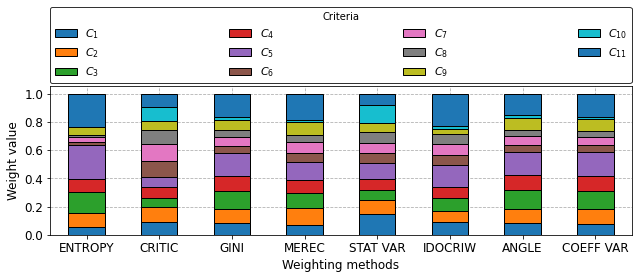

In [15]:
plot_barplot(df_weights, 'Weighting methods', 'Weight value', 'Criteria')

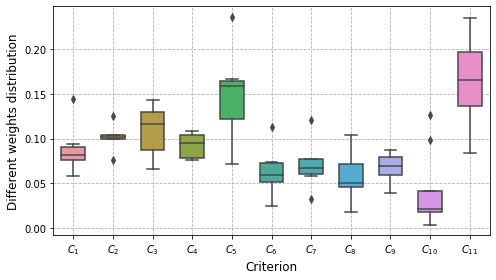

In [16]:
plot_boxplot(df_weights.T)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


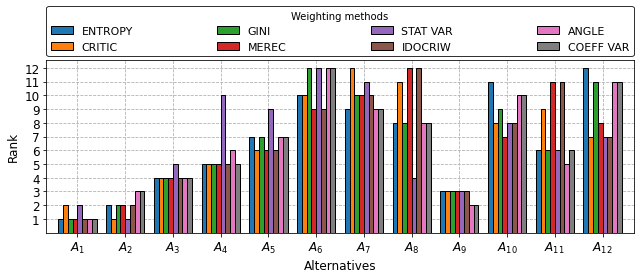

In [17]:
plot_barplot(df_rankings, 'Alternatives', 'Rank', 'Weighting methods')

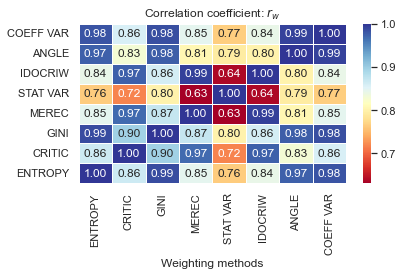

In [18]:
results = copy.deepcopy(df_rankings)
method_types = list(results.columns)
dict_new_heatmap_rw = Create_dictionary()

for el in method_types:
    dict_new_heatmap_rw.add(el, [])

# heatmaps for correlations coefficients
for i, j in [(i, j) for i in method_types[::-1] for j in method_types]:
    dict_new_heatmap_rw[j].append(corrs.weighted_spearman(results[i], results[j]))

df_new_heatmap_rw = pd.DataFrame(dict_new_heatmap_rw, index = method_types[::-1])
df_new_heatmap_rw.columns = method_types

# correlation matrix with rw coefficient
draw_heatmap(df_new_heatmap_rw, r'$r_w$')

## Stochastic Multicriteria Acceptability Analysis Method (SMAA)

In [19]:
cols_ai = [str(el) for el in range(1, matrix.shape[0] + 1)]

In [20]:
# criteria number
n = matrix.shape[1]
# number of SMAA iterations
iterations = 10000

In [21]:
# create the VIKOR_SMAA method object
vikor_smaa = VIKOR_SMAA()
# generate multiple weight vectors in matrix
weight_vectors = vikor_smaa._generate_weights(n, iterations)

In [22]:
# Calculate the rank acceptability index, central weight vector and final ranking
rank_acceptability_index, central_weight_vector, rank_scores = vikor_smaa(matrix, weight_vectors, types)

In [23]:
acc_in_df = pd.DataFrame(rank_acceptability_index, index = list_alt_names, columns = cols_ai)
acc_in_df.to_csv('results_smaa/ai.csv')

### Rank acceptability indexes
This is dataframe with rank acceptability indexes for each alternative in relation to ranks. Rank acceptability index shows the share of different scores placing an alternative in a given rank.

In [24]:
acc_in_df

,1,2,3,4,5,6,7,8,9,10,11,12
$A_{1}$,0.2395,0.2499,0.1847,0.1341,0.0540,0.0532,0.0240,0.0441,0.0128,0.0037,0.0000,0.0000
$A_{2}$,0.2207,0.3576,0.2252,0.1155,0.0405,0.0351,0.0054,0.0000,0.0000,0.0000,0.0000,0.0000
$A_{3}$,0.0002,0.0102,0.0249,0.0723,0.2924,0.1429,0.1516,0.1359,0.1589,0.0107,0.0000,0.0000
$A_{4}$,0.1063,0.0660,0.0749,0.1386,0.1666,0.2296,0.0797,0.0375,0.0303,0.0348,0.0357,0.0000
$A_{5}$,0.0005,0.0117,0.0142,0.0218,0.0743,0.1069,0.2564,0.1403,0.1311,0.2230,0.0198,0.0000
$A_{6}$,0.0000,0.0009,0.0074,0.0419,0.0242,0.0364,0.1318,0.1158,0.1524,0.1630,0.1418,0.1844
$A_{7}$,0.0000,0.0000,0.0007,0.0013,0.0061,0.0314,0.0344,0.0342,0.0888,0.0766,0.0900,0.6365
$A_{8}$,0.0000,0.0024,0.0025,0.0055,0.0643,0.0438,0.0574,0.1469,0.0771,0.1191,0.4416,0.0394
$A_{9}$,0.3859,0.1073,0.2818,0.0416,0.0312,0.0284,0.0224,0.0168,0.0644,0.0202,0.0000,0.0000
$A_{10}$,0.0095,0.0357,0.0681,0.0707,0.0858,0.1597,0.0998,0.0698,0.1491,0.1512,0.0889,0.0117


Rank acceptability indexes displayed in the form of stacked bar chart.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


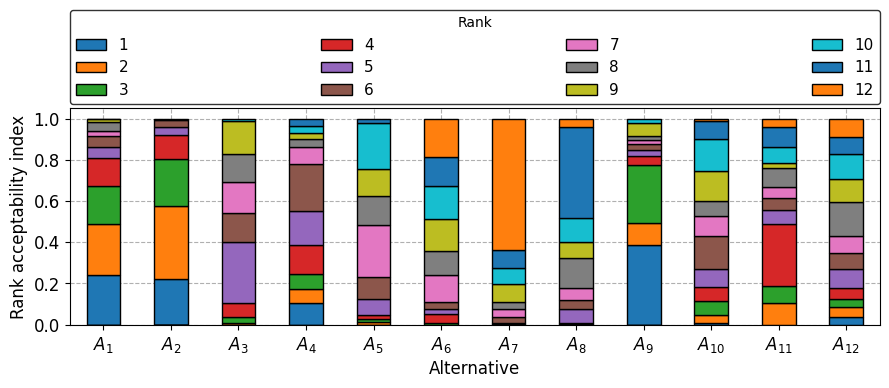

In [25]:
matplotlib.rcdefaults()
plot_barplot(acc_in_df, 'Alternative', 'Rank acceptability index', 'Rank')

Rank acceptability indexes displayed in the form of heatmap

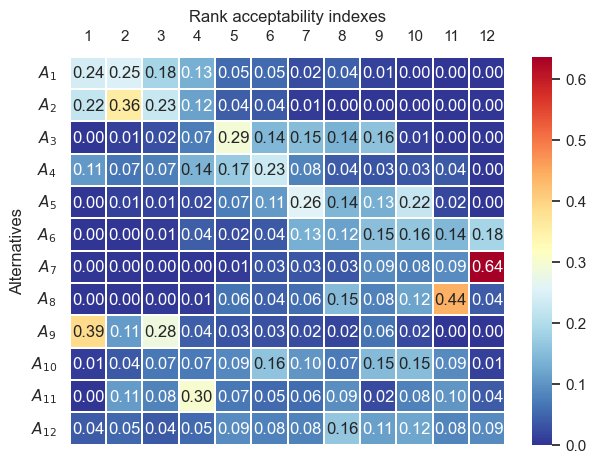

In [26]:
draw_heatmap_smaa(acc_in_df, 'Rank acceptability indexes')

### Central weight vector
The central weight vector describes the preferences of a typical decision-maker, supporting this alternative with the assumed preference model. It allows the decision-maker to see what criteria preferences result in the best evaluation of given alternatives. Rows containing only zeroes mean that a given alternative never becomes a leader.

In [27]:
central_weights_df = pd.DataFrame(central_weight_vector, index = list_alt_names, columns = cols)
central_weights_df.to_csv('results_smaa/cw.csv')

In [28]:
central_weights_df

,$C_{1}$,$C_{2}$,$C_{3}$,$C_{4}$,$C_{5}$,$C_{6}$,$C_{7}$,$C_{8}$,$C_{9}$,$C_{10}$,$C_{11}$
$A_{1}$,0.085557,0.068852,0.163567,0.127721,0.120978,0.074311,0.073052,0.079822,0.055629,0.053372,0.097139
$A_{2}$,0.119505,0.091197,0.076790,0.123850,0.056169,0.080498,0.080611,0.079016,0.071870,0.109797,0.110698
$A_{3}$,0.025481,0.024065,0.193722,0.116842,0.152955,0.039404,0.032034,0.020895,0.005310,0.268307,0.120985
$A_{4}$,0.043895,0.085792,0.066643,0.056497,0.065895,0.084770,0.092258,0.084303,0.081521,0.206366,0.132060
$A_{5}$,0.041701,0.283298,0.035020,0.057731,0.051069,0.046757,0.037362,0.032076,0.100242,0.243114,0.071629
$A_{6}$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
$A_{7}$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
$A_{8}$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
$A_{9}$,0.096995,0.115952,0.066120,0.061943,0.105055,0.101578,0.099929,0.104295,0.132537,0.055860,0.059736
$A_{10}$,0.056299,0.030817,0.041581,0.150271,0.045265,0.087209,0.107615,0.080866,0.073499,0.227022,0.099554


### Rank scores

In [29]:
rank_scores_df = pd.DataFrame(rank_scores, index = list_alt_names, columns = ['Rank'])
rank_scores_df.to_csv('results_smaa/fr.csv')

In [30]:
rank_scores_df

,Rank
$A_{1}$,3
$A_{2}$,1
$A_{3}$,6
$A_{4}$,4
$A_{5}$,9
$A_{6}$,10
$A_{7}$,12
$A_{8}$,11
$A_{9}$,2
$A_{10}$,7


## Subjective weighting methods

The illustrative example concerns the multi-criteria problem involving a selection of four alternative sites in Poland for wind farm location regarding ten criteria assessment. The data for this problem used in the procedure for determining the criteria weights in this example and the data on the performance of the alternatives against the evaluation criteria were acquired from the research paper https://doi.org/10.3390/su8080702

In [5]:
# Load data from csv file
data = pd.read_csv('./dataset_localisations.csv', index_col='Symbol')

# decision matrix with alternatives' performance values
df_data = data.iloc[:len(data) - 1, :]

# Criteria types
types = data.iloc[len(data) - 1, :].to_numpy()

# Decision matrix in numpy.ndarray data type required by methods implemented in crispyn package
matrix = df_data.to_numpy()

# Column names
cols = [r'$C_{' + str(j) + '}$' for j in range(1, matrix.shape[1] + 1)]

# Dataframe for weight values determined by different weighting methods
df_weights = pd.DataFrame(index = cols)

In [6]:
df_data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
Symbol,,,,,,,,,,
A1,106780,6.75,2,220,6,1,52,455.5,8.9,36.8
A2,86370,7.12,3,400,10,0,20,336.5,7.2,29.8
A3,104850,6.95,60,220,7,1,60,416.0,8.7,36.2
A4,46600,6.04,1,220,3,0,50,277.0,3.9,16.0


### AHP weighting method

Construct matrix with criteria pairwise comparison as `numpy.ndarray` type

In [7]:
PCcriteria_ahp = np.array([
    [1, 2, 2, 2, 6, 2, 1, 1, 1/2, 1/2],
    [1/2, 1, 1, 1, 4, 1, 1, 1, 1/2, 1/2],
    [1/2, 1, 1, 1, 3, 1, 1/2, 1/2, 1/3, 1/3],
    [1/2, 1, 1, 1, 3, 1, 1/2, 1/2, 1/3, 1/3],
    [1/6, 1/4, 1/3, 1/3, 1, 1/3, 1/5, 1/5, 1/9, 1/9],
    [1/2, 1, 1, 1, 3, 1, 1/2, 1/2, 1/3, 1/3],
    [1, 1, 2, 2, 5, 2, 1, 1, 1/2, 1/2],
    [1, 1, 2, 2, 5, 2, 1, 1, 1/2, 1/2],
    [2, 2, 3, 3, 9, 3, 2, 2, 1, 1],
    [2, 2, 3, 3, 9, 3, 2, 2, 1, 1]
])

Calculate AHP weights

In [8]:
# Initialize the `AHP_WEIGHTING` method object
ahp_weighting = mcda_weights.AHP_WEIGHTING()

# Calculate AHP weights passing matrix with criteria pairwise comparison and method of priority vector calculation
weights_ahp = ahp_weighting(X = PCcriteria_ahp, compute_priority_vector_method=ahp_weighting._eigenvector)

# save calculated AHP weights in dataframe for weights
df_weights['AHP'] = weights_ahp

Inconsistency index:  0.006188266444440638


In [9]:
weights_ahp

array([0.11649504, 0.08039711, 0.0614321 , 0.0614321 , 0.02051697,
       0.0614321 , 0.10648668, 0.10648668, 0.1926606 , 0.1926606 ])

### SWARA weighting method

Provide vector `criteria_indexes` (numpy.ndarray type) with indexes of criteria in accordance with given decision problem from $C_1$ to $C_n$ ordered in descending order beginning from the most important criterion and vector `s` including values representing how much criterion (j-1) is more significant than criterion j in percentage in range from 0 to 1

In [10]:
# criteria ordered in descending order from the most significant
criteria_indexes = np.array([8, 9, 0, 6, 7, 1, 2, 3, 5, 4])
# vector s
s = np.array([0, 0.4, 0.17, 0, 0.2, 0.25, 0, 0, 0.67])

# Calculate SWARA weights
weights_swara = mcda_weights.swara_weighting(criteria_indexes, s)

# save calculated AHP weights in dataframe for weights
df_weights['SWARA'] = weights_swara

### LBWA weighting method

Construct list with lists (subsets) `criteria_indexes` of grouped and ordered index of criteria according to their significance beginning from the most important within each subset and list with lists containing influence values of criteria within each subset provided in order beginning from the most significant `criteria_values_I`. Then calculate LBWA weights using `lbwa_weighting` function.

In [11]:
criteria_indexes = [
    [8, 9, 0],
    [6, 7, 1],
    [2, 3, 5],
    [],
    [],
    [],
    [],
    [],
    [],
    [4]
]

criteria_values_I = [
    [0, 0, 2],
    [1, 1, 2],
    [1, 1, 1],
    [],
    [],
    [],
    [],
    [],
    [],
    [3]
]

weights_lbwa = mcda_weights.lbwa_weighting(criteria_indexes, criteria_values_I)

df_weights['LBWA'] = weights_lbwa

### SAPEVO weighting method

Construct matrix with degrees of pairwise criteria comparison in scale from -3 to 3, then calculate criteria weights using `sapevo_weighting` function.

In [12]:
PCcriteria_sapevo = np.array([
    [ 0, 1, 1, 1, 2, 1, 0, 0, -1, -1],
    [-1, 0, 0, 0, 1, 0, 0, 0, -1, -1],
    [-1, 0, 0, 0, 1, 0, -1, -1, -1, -1],
    [-1, 0, 0, 0, 1, 0, -1, -1, -1, -1],
    [-2, -1, -1, -1, 0, -1, -2, -2, -3, -3],
    [-1, 0, 0, 0, 1, 0, -1, -1, -1, -1],
    [ 0, 0, 1, 1, 2, 1, 0, 0, -1, -1],
    [ 0, 0, 1, 1, 2, 1, 0, 0, -1, -1],
    [ 1, 1, 1, 1, 3, 1, 1, 1, 0, 0],
    [ 1, 1, 1, 1, 3, 1, 1, 1, 0, 0]
])

weights_sapevo = mcda_weights.sapevo_weighting(PCcriteria_sapevo)

df_weights['SAPEVO'] = weights_sapevo

In [13]:
df_weights

,AHP,SWARA,LBWA,SAPEVO
$C_{1}$,0.116495,0.120886,0.134093,0.12500
$C_{2}$,0.080397,0.086101,0.080456,0.08750
$C_{3}$,0.061432,0.068881,0.061889,0.07500
$C_{4}$,0.061432,0.068881,0.061889,0.07500
$C_{5}$,0.020517,0.041246,0.018711,0.00000
$C_{6}$,0.061432,0.068881,0.061889,0.07500
$C_{7}$,0.106487,0.103321,0.089396,0.11875
$C_{8}$,0.106487,0.103321,0.089396,0.11875
$C_{9}$,0.192661,0.169240,0.201140,0.16250
$C_{10}$,0.192661,0.169240,0.201140,0.16250


Visualize criteria weights calculated with each subjective weighting method in column charts and radar chart.

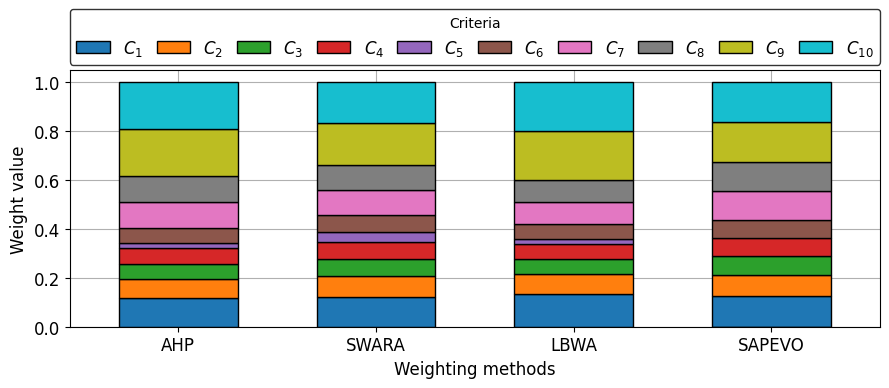

In [14]:
plot_barplot_stacked(df_weights.T, stacked = True)

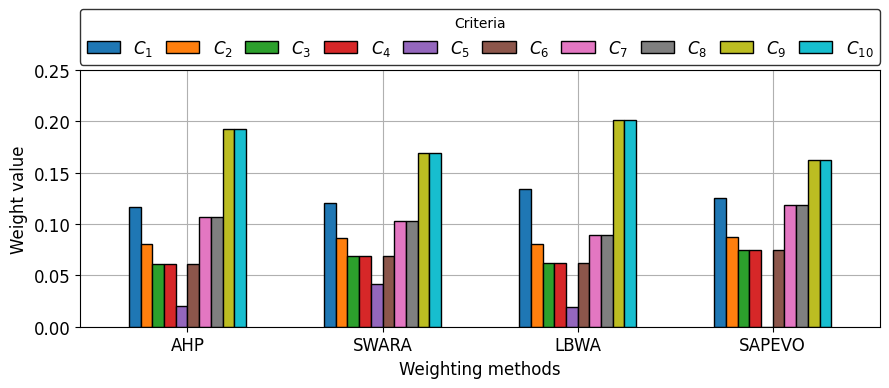

In [15]:
plot_barplot_stacked(df_weights.T, stacked = False)

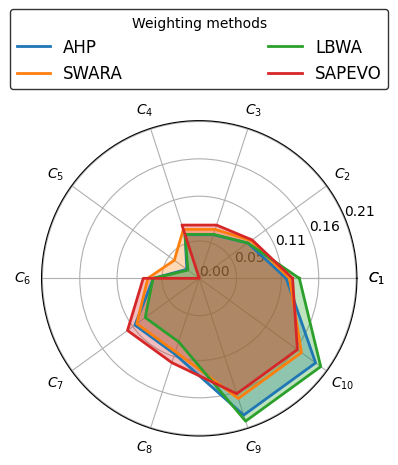

In [16]:
plot_radar_weights(df_weights)

Determine utility function values using the VIKOR method and rank alternatives to generate rankings for each weighting method.

In [17]:
weighting_methods_names = ['AHP', 'SWARA', 'LBWA', 'SAPEVO']
weights_list = [weights_ahp, weights_swara, weights_lbwa, weights_sapevo]

# MCDA assessment
# dataframe for alternatives
alts = [r'$A_{' + str(j) + '}$' for j in range(1, matrix.shape[0] + 1)]
df_prefs = pd.DataFrame(index = alts)
df_ranks = pd.DataFrame(index = alts)

vikor = VIKOR()
for el, weights in enumerate(weights_list):
    pref = vikor(matrix, weights, types)
    rank = rank_preferences(pref, reverse=False)

    df_prefs[weighting_methods_names[el]] = pref
    df_ranks[weighting_methods_names[el]] = rank

In [18]:
df_prefs

,AHP,SWARA,LBWA,SAPEVO
$A_{1}$,0.971262,0.922828,0.863588,0.962927
$A_{2}$,0.000000,0.000000,0.000000,0.000000
$A_{3}$,0.941176,0.941176,0.861822,0.925714
$A_{4}$,0.954106,0.882663,1.000000,0.937836


In [19]:
df_ranks

,AHP,SWARA,LBWA,SAPEVO
$A_{1}$,4,3,3,4
$A_{2}$,1,1,1,1
$A_{3}$,2,4,2,2
$A_{4}$,3,2,4,3


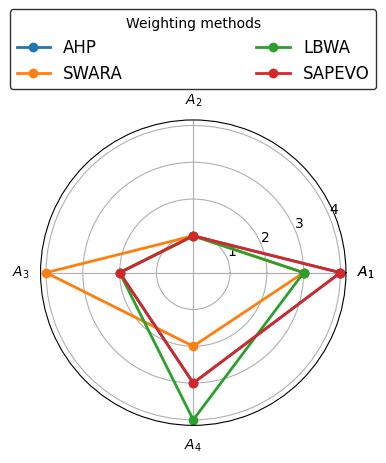

In [20]:
plot_radar(df_ranks)